In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

# Calculate mean square error
from sklearn.metrics import mean_squared_error 

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statistics

In [2]:
def featureNormalize(x):
    # Normalize a given array
    x_norm = x.copy()
    x_norm = (x_norm - np.mean(x_norm))/(np.std(x_norm))
    
    return x_norm

In [3]:
house_data = pd.read_csv('house_data_complete.csv')

# Drop useless columns
house_data = house_data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)

# Convert to array
house_data = house_data.to_numpy()

# Shuffle
np.random.shuffle(house_data)

# Number of elements
m = house_data.shape[0]

# Split x and y
x = house_data[:, 1:]
y = house_data[:, 0]

x = featureNormalize(x)

# Split into three parts 60/20/20
x_train, x_cv, x_test = np.split(x, [int(0.6*m), int(0.8*m)])
y_train, y_cv, y_test = np.split(y, [int(0.6*m), int(0.8*m)])

In [4]:
def computeCostMulti(X, y, theta, lambda_):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    
    J = 1/(2*m)*np.dot((np.dot(X, theta) - y.T), (np.dot(X, theta) - y.T)) + lambda_/(2*m) * np.sum(np.square(theta))     
    # ==================================================================
    return J


In [5]:
def gradientDescentMulti(X, y, theta, alpha, num_iters, lambda_):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        
        alphabym=alpha/m
        sumofh0x=np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(X.T,sumofh0x-y)))+lambda_*theta
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta, lambda_))
    
    return theta, J_history

Text(0.5, 1.0, 'Hypothesis 1 Cost')

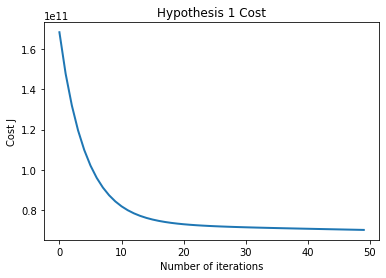

In [6]:
# Hypothesis 1: Linear

# training set length
m = x_train.shape[0]

# theta length = n+1 features
theta = np.zeros(x_train.shape[1]+1)

# append column to x training
x_train = np.concatenate([np.ones((m, 1)), x_train], axis=1)

# run settings
alpha = 0.1
n_runs = 50
lambda_ = 0.0001

theta, J_history = gradientDescentMulti(x_train, y_train, theta, alpha, n_runs, lambda_)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Hypothesis 1 Cost')

In [7]:
# Test hypothesis 1

# cv set length
m = x_cv.shape[0]
# append column to x cv
x_cv = np.concatenate([np.ones((m, 1)), x_cv], axis=1)
# compute cost
print(computeCostMulti(x_cv, y_cv, theta, lambda_))

# test set length
m = x_test.shape[0]
# append column to x cv
x_test = np.concatenate([np.ones((m, 1)), x_test], axis=1)
# compute cost
print(computeCostMulti(x_test, y_test, theta, lambda_))

# test randow rom
print(np.dot(theta.T, x_test[16]), y_test[16])

61079195479.84738
51863939345.99713
536968.1379787233 334990.0


In [8]:
#Hypothesis 2: polynomial sqft_living

# Split x and y
x = house_data[:, 1:]
y = house_data[:, 0]

# add new column sqft_living^2
x = np.append(x, np.square(x[:, 2:3]), axis=1)

x = featureNormalize(x)

# Split into three parts 60/20/20
x_train, x_cv, x_test = np.split(x, [int(0.6*m), int(0.8*m)])
y_train, y_cv, y_test = np.split(y, [int(0.6*m), int(0.8*m)])

Text(0.5, 1.0, 'Hypothesis 2 Cost')

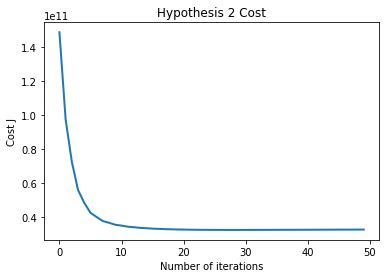

In [9]:
# training set length
m = x_train.shape[0]

# theta length = n+1 features
theta = np.zeros(x_train.shape[1]+1)

# append column to x training
x_train = np.concatenate([np.ones((m, 1)), x_train], axis=1)

# run settings
alpha = 0.1
n_runs = 50
lambda_ = 0.01

theta, J_history = gradientDescentMulti(x_train, y_train, theta, alpha, n_runs, lambda_)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Hypothesis 2 Cost')

In [10]:
# Test hypothesis 2

# cv set length
m = x_cv.shape[0]
# append column to x cv
x_cv = np.concatenate([np.ones((m, 1)), x_cv], axis=1)
# compute cost
print(computeCostMulti(x_cv, y_cv, theta, lambda_))

# test set length
m = x_test.shape[0]
# append column to x cv
x_test = np.concatenate([np.ones((m, 1)), x_test], axis=1)
# compute cost
print(computeCostMulti(x_test, y_test, theta, lambda_))

# test randow rom
print(np.dot(theta.T, x_test[16]), y_test[16])

28662911938.565395
32283886859.69568
364360.06465368223 522000.0


In [11]:
#Hypothesis 3: polynomial sqft_living and grade

# Split x and y
x = house_data[:, 1:]
y = house_data[:, 0]

# add new column sqft_living^2
x = np.append(x, np.square(x[:, 2:3]), axis=1)
x = np.append(x, np.square(x[:, 8:9]), axis=1)

x = featureNormalize(x)

# Split into three parts 60/20/20
x_train, x_cv, x_test = np.split(x, [int(0.6*m), int(0.8*m)])
y_train, y_cv, y_test = np.split(y, [int(0.6*m), int(0.8*m)])

Text(0.5, 1.0, 'Hypothesis 3 Cost')

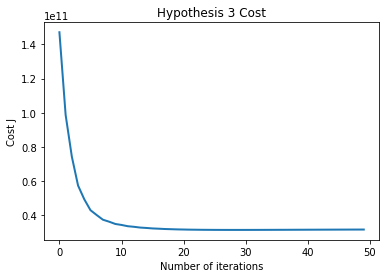

In [12]:
# training set length
m = x_train.shape[0]

# theta length = n+1 features
theta = np.zeros(x_train.shape[1]+1)

# append column to x training
x_train = np.concatenate([np.ones((m, 1)), x_train], axis=1)

# run settings
alpha = 0.1
n_runs = 50
lambda_ = 0.01

theta, J_history = gradientDescentMulti(x_train, y_train, theta, alpha, n_runs, lambda_)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Hypothesis 3 Cost')

In [13]:
# Test hypothesis 3

# cv set length
m = x_cv.shape[0]
# append column to x cv
x_cv = np.concatenate([np.ones((m, 1)), x_cv], axis=1)
# compute cost
print(computeCostMulti(x_cv, y_cv, theta, lambda_))

# test set length
m = x_test.shape[0]
# append column to x cv
x_test = np.concatenate([np.ones((m, 1)), x_test], axis=1)
# compute cost
print(computeCostMulti(x_test, y_test, theta, lambda_))

# test randow rom
print(np.dot(theta.T, x_test[16]), y_test[16])

36996827536.1272
29837928470.08075
362358.8905246955 172500.0


In [14]:
# Three fold testing


# Number of elements
m = house_data.shape[0]

# Split x and y
x = house_data[:, 1:]
y = house_data[:, 0]

# append column to x
x = np.concatenate([np.ones((m, 1)), x], axis=1)

x = featureNormalize(x)

# Split into three parts 33/33/33
x1, x2, x3 = np.split(x, [int(0.33*m), int(0.66*m)])
y1, y2, y3 = np.split(y, [int(0.33*m), int(0.66*m)])

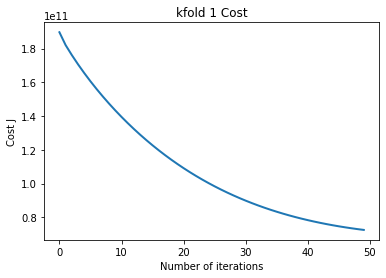

In [15]:
# Train 1
kfoldcost = []
# run settings
alpha = 0.1
n_runs = 50
lambda_ = 0.01

x_train = np.concatenate([x1, x2], axis=0)
y_train = np.concatenate([y1, y2])

theta = np.zeros(x_train.shape[1])

theta, J_history = gradientDescentMulti(x_train, y_train, theta, alpha, n_runs, lambda_)
# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('kfold 1 Cost')

# test 1

kfoldcost.append(computeCostMulti(x3, y3, theta, lambda_))

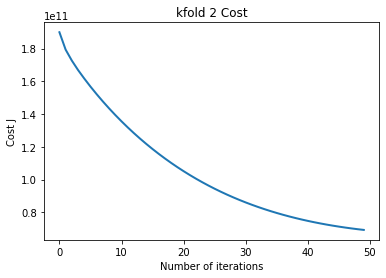

In [16]:
# Train 2
# run settings
alpha = 0.1
n_runs = 50
lambda_ = 0.01

x_train = np.concatenate([x1, x3], axis=0)
y_train = np.concatenate([y1, y3])

theta = np.zeros(x_train.shape[1])

theta, J_history = gradientDescentMulti(x_train, y_train, theta, alpha, n_runs, lambda_)
# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('kfold 2 Cost')

# test 2

kfoldcost.append(computeCostMulti(x2, y2, theta, lambda_))

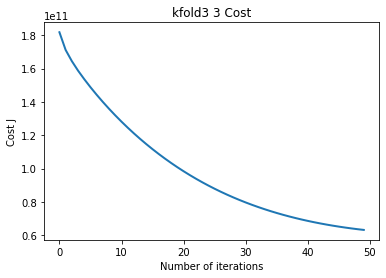

In [17]:
# Train 3
# run settings
alpha = 0.1
n_runs = 50
lambda_ = 0.01

x_train = np.concatenate([x2, x3], axis=0)
y_train = np.concatenate([y2, y3])

theta = np.zeros(x_train.shape[1])

theta, J_history = gradientDescentMulti(x_train, y_train, theta, alpha, n_runs, lambda_)
# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('kfold3 3 Cost')

# test 3

kfoldcost.append(computeCostMulti(x1, y1, theta, lambda_))

In [18]:
print(kfoldcost)
print(statistics.mean(kfoldcost))

[59299910358.53708, 66176426356.71234, 79959285211.19746]
68478540642.148964


Text(0.5, 0, 'grade')

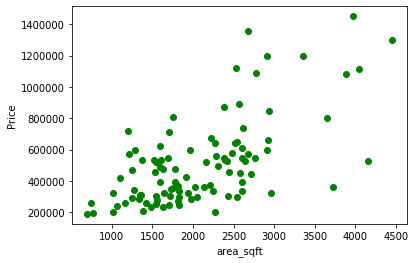

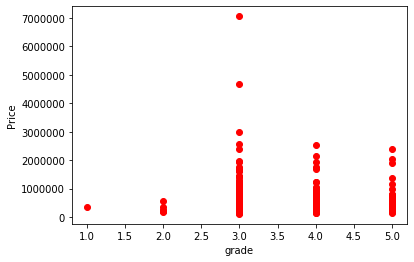

In [19]:
# visualize some data
x = house_data[:, 1:]
y = house_data[:, 0]

plt.plot(x[:100, 2], y[:100], 'go')
plt.ylabel('Price')
plt.xlabel('area_sqft')

plt.figure()
plt.plot(x[:500, 7], y[:500], 'ro')
plt.ylabel('Price')
plt.xlabel('grade')

In [20]:
print(x1, x2)

[[-0.17080961 -0.17058237 -0.17073387 ... -0.17088536 -0.0640834
   0.56544217]
 [-0.17080961 -0.17058237 -0.17063918 ... -0.17088536  0.01847981
   2.53135563]
 [-0.17080961 -0.17073387 -0.1707528  ... -0.17088536 -0.04363196
   0.47068384]
 ...
 [-0.17080961 -0.17058237 -0.17069599 ... -0.17088536 -0.01484846
   0.39569523]
 [-0.17080961 -0.17050663 -0.17062025 ... -0.17088536  0.03817379
   0.17656186]
 [-0.17080961 -0.17065812 -0.17077174 ... -0.17088536 -0.07696023
  -0.09316989]] [[-0.17080961 -0.17050663 -0.17069599 ... -0.17088536  0.08059159
   0.40970826]
 [-0.17080961 -0.17073387 -0.17080961 ... -0.17088536 -0.02469545
   0.72829622]
 [-0.17080961 -0.17058237 -0.17069599 ... -0.17088536  0.03135664
   0.29889176]
 ...
 [-0.17080961 -0.17043088 -0.17069599 ... -0.17088536  0.01651041
   0.62096404]
 [-0.17080961 -0.17058237 -0.1707528  ... -0.17088536  0.10407287
   1.07801582]
 [-0.17080961 -0.17058237 -0.17071493 ... -0.17088536  0.01166267
   2.60748043]]
